# 4. Mushroom foraging

The [mushroom dataset](https://www.kaggle.com/datasets/dhinaharp/mushroom-dataset) contains data about approximately 60000 mushrooms, and your task is to classify them as either edible or poisonous. You can read about the features [here](https://www.kaggle.com/datasets/uciml/mushroom-classification) and import the data using:

Shape of X_train_processed: (48855, 128)
Shape of X_test_processed: (12214, 128)


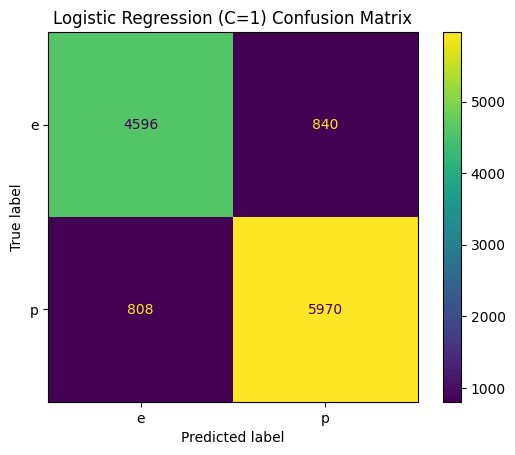

0.8672602599529219
0.865072867201572


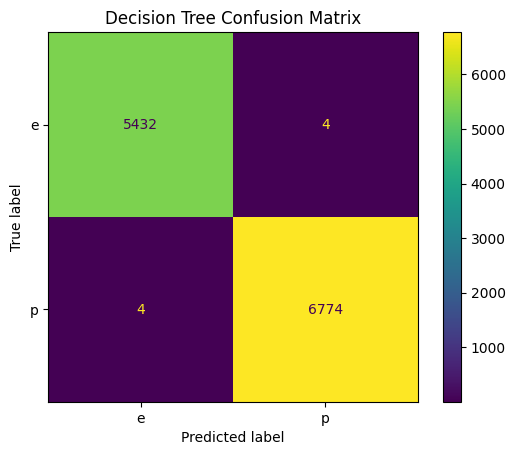

1.0
0.9993450139184542


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import mglearn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


pd.set_option('display.max_columns', 1000)
df = pd.read_csv('secondary_data.csv',delimiter=';')

# Separate features (X) and target (y)
X = df.drop('class', axis=1)  # Define X here
y = df['class']
df.drop(['gill-spacing', 'stem-root', 'veil-type', 'veil-color', 'stem-surface', 'spore-print-color'], inplace=True, axis=1)
df.dropna()

categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# One-Hot Encode Categorical Features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])
# Scale Numerical Features
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_numerical = scaler.transform(X_test[numerical_features])

# Concatenate Encoded and Scaled Features
X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)

print("Shape of X_train_processed:", X_train.shape)
print("Shape of X_test_processed:", X_test.shape)
lr = LogisticRegression(
    C=1,
    penalty="elasticnet",
    solver="saga",
    l1_ratio=1,
    tol=0.01,
    random_state=42,
    max_iter=1000  # added max_iter to prevent convergence warnings
)  # Increased max_iter
lr.fit(X_train, y_train)
scores = {
    'train accuracy': lr.score(X_train, y_train),
    'test accuracy': lr.score(X_test, y_test),
}

# Confusion Matrix for Logistic Regression
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=['e', 'p'])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['e', 'p'])
disp_lr.plot()
plt.title(f"Logistic Regression (C=1) Confusion Matrix")
plt.show()


dtr = DecisionTreeClassifier(max_depth=100, random_state=42)
dtr.fit(X_train, y_train)
scores_tree = {
    'train accuracy': dtr.score(X_train, y_train),
    'test accuracy': dtr.score(X_test, y_test),
}
print(scores['train accuracy'])
print(scores['test accuracy'])

# Confusion Matrix for Decision Tree
y_pred_tree = dtr.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=['e', 'p'])
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['e', 'p'])
disp_tree.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

dtr = DecisionTreeClassifier(max_depth=100, random_state=42)
dtr.fit(X_train, y_train)
scores_tree = {
    'train accuracy': dtr.score(X_train, y_train),
    'test accuracy': dtr.score(X_test, y_test),
}

print(scores_tree['train accuracy'])
print(scores_tree['test accuracy'])

It's up to you how you approach this data, but at a minimum, your analysis should include:

* Informed **data preparation**.
* 2 different classification models, one of which must be **logistic regression**.
* A discussion of which **performance metric** is most relevant for the evaluation of your models.
* 2 different **validation methodologies** used to tune hyperparameters.
* **Confusion matrices** for your models, and associated comments.